#**The Blockade effect**
Investigate the blockade effect on neutral atoms quantum machines.
* define custom devices on Pulser (https://pulser.readthedocs.io/en/stable/)
* How to reach a Rydberg state on a single qubits
* Maximal opposite entanglement with 2 qubits

##Probability of a Rydberg state
$n$ = number of qubits

$\Omega$ = rabi frequency 
\begin{equation}
\mathbb{P}_{|r\rangle}(t)=\frac{1}{n}sin^2(\frac{\Omega}{2}\sqrt{n}t)
\end{equation}
Time to reach maximal opposite entanglement
\begin{equation}
t=\frac{\pi}{\sqrt{n}\Omega}
\end{equation}


In [1]:
!pip install pulser==0.7

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.4/108.4 KB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.7/72.7 KB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 26.7 MB/s eta 0:00:00
  Attempting uninstall: jsonschema
    Found existing installation: jsonschema 4.3.3
    Uninstalling jsonschema-4.3.3:
      Successfully uninstalled jsonschema-4.3.3


In [2]:
%matplotlib inline

In [1]:
import matplotlib.pyplot as plt

def plot_distribution(count_dict):
    plt.xlabel("bitstrings")
    plt.ylabel("counts")
    plt.bar(count_dict.keys(), count_dict.values(), width=0.5)
    plt.xticks(rotation='vertical')
    plt.show()

c:\Users\ChiaraVercellino\miniconda3\lib\site-packages\pulser\pulse.py:176: UserWarning: A waveform duration of 27.04240955953836 ns is below the supported precision of 1 ns. It was rounded down to 27 ns.
  amplitude_wf = ConstantWaveform(duration, amplitude)
c:\Users\ChiaraVercellino\miniconda3\lib\site-packages\pulser\pulse.py:177: UserWarning: A waveform duration of 27.04240955953836 ns is below the supported precision of 1 ns. It was rounded down to 27 ns.
  detuning_wf = ConstantWaveform(duration, detuning)


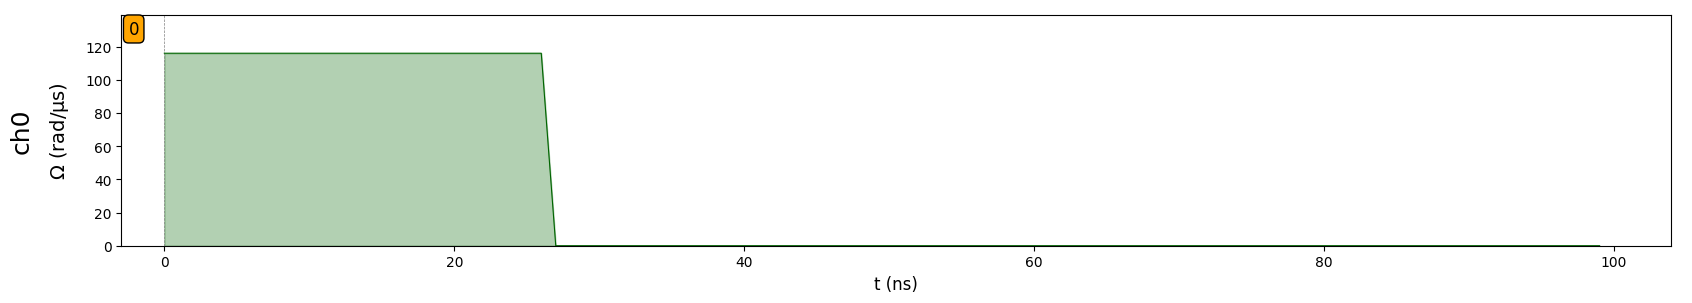

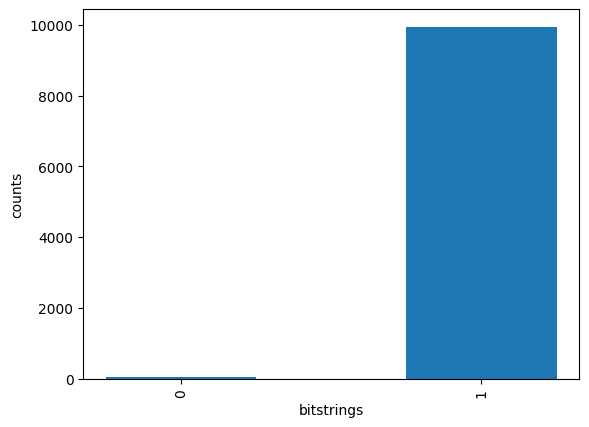

In [3]:
import numpy as np
from pulser import Pulse, Sequence, Register
from pulser.devices import MockDevice
from pulser_simulation import Simulation

n=1
qubit = {0: [0,0]}
reg = Register(qubit)
# rydberg radius
r = 6
# rabi frequency
omega=MockDevice.rabi_from_blockade(r)
# time to reach |r> with rabi frequency omega
t=np.pi/(np.sqrt(n)*omega)

# create sequence
seq = Sequence(reg, MockDevice)
seq.declare_channel("ch0", "rydberg_local", initial_target=0)
pulse = Pulse.ConstantPulse(t*1000, omega, 0, 0)
seq.add(pulse, "ch0")
seq.draw()

# measurement
seq.measure('ground-rydberg')   

sim = Simulation(seq, sampling_rate=0.5)
sim.initial_state='all-ground'
sim.evaluation_times = np.linspace(0, sim._tot_duration/1000, 10)
results = sim.run(nsteps=10000)

counter = results.sample_final_state(N_samples=10000)

plot_distribution(counter)